# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.manifold import Isomap



# Read in Dataset

In [2]:
data = pd.read_csv("codon_usage.csv")
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Unnamed: 69
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,0.99903
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,0.99999
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,0.99997
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,1.00002
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,0.99997


# Clean Data and Split into Testing and Training Sets

In [3]:
# Using the Ncodons column and the 64 codon frequency columns as feature columns, not using SpeciesID or DNAtype
feature_cols = data.columns[np.r_[3, 5:69]]

species = data["SpeciesName"].values

print(feature_cols)

X = data[feature_cols].values

# Data cleaning
data[feature_cols] = data[feature_cols].replace('-', 0)
data[feature_cols] = data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)


# Kingdom column is what is being classified
y = data['Kingdom'].values


Index(['Ncodons', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG',
       'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA',
       'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU',
       'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU',
       'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA'],
      dtype='object')


In [4]:
# Scale data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 80-20 split


X_train, X_test, y_train, y_test, species_train, species_test = train_test_split(
    X_scaled, y, species, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# DNAtype is not being classified because it has classes that are too small

print(data['DNAtype'].value_counts())

# Kingdom column has a more even distribution of classes

print(data['Kingdom'].value_counts())

DNAtype
0     9266
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: count, dtype: int64
Kingdom
bct    2920
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64


# Run classification on Original Dataset

In [6]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy Random Forest: {train_acc:.3f}, Test Accuracy Random Forest: {test_acc:.3f}")

Train Accuracy Random Forest: 1.000, Test Accuracy Random Forest: 0.894


In [8]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy SVC: {train_acc:.3f}, Test Accuracy SVC: {test_acc:.3f}")

Train Accuracy SVC: 0.957, Test Accuracy SVC: 0.936


In [9]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy Logistic Regression: {train_acc:.3f}, Test Accuracy Logistic Regression: {test_acc:.3f}")

Train Accuracy Logistic Regression: 0.870, Test Accuracy Logistic Regression: 0.862


# Perform Linear dimensionality reduction algorithm

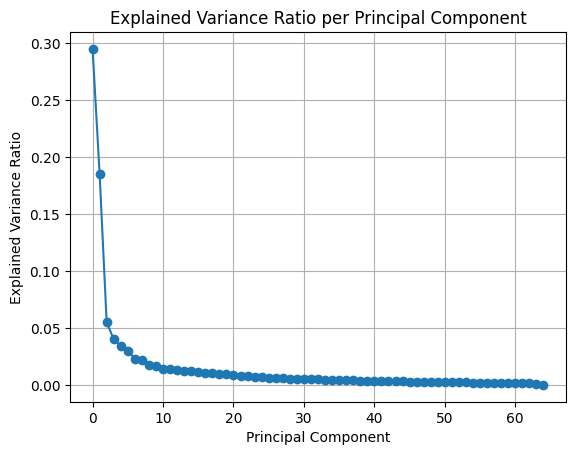

In [10]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance plot
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid(True)
plt.show()


In [39]:
# codon_labels is a list of the feature columns in the same order as columns in X_scaled
codon_labels = ["ncodons", "UUU","UUC","UUA","UUG","CUU","CUC","CUA","CUG",
                "AUU","AUC","AUA","AUG","GUU","GUC","GUA","GUG",
                "GCU","GCC","GCA","GCG","CCU","CCC","CCA","CCG",
                "UGG","GGU","GGC","GGA","GGG","UCU","UCC","UCA",
                "UCG","AGU","AGC","ACU","ACC","ACA","ACG","UAU",
                "UAC","CAA","CAG","AAU","AAC","UGU","UGC","CAU",
                "CAC","AAA","AAG","CGU","CGC","CGA","CGG","AGA",
                "AGG","GAU","GAC","GAA","GAG","UAA","UAG","UGA"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Extract first principal component weights
pc1_weights = pca.components_[0]

# Identify GC-ending vs AT-ending codons
gc_end_idx = [i for i, codon in enumerate(codon_labels) if codon[-1] in ["G","C"]]
at_end_idx = [i for i, codon in enumerate(codon_labels) if codon[-1] in ["A","U"]]

# Sum absolute weights for each group
gc_sum = np.sum(np.abs(pc1_weights[gc_end_idx]))
at_sum = np.sum(np.abs(pc1_weights[at_end_idx]))

# Compute GC/AT ratio
gc_at_ratio = gc_sum / at_sum

print(f"Sum of PC1 weights for GC-ending codons: {gc_sum:.4f}")
print(f"Sum of PC1 weights for AT-ending codons: {at_sum:.4f}")
print(f"GC/AT ratio for PC1: {gc_at_ratio:.4f}")

Sum of PC1 weights for GC-ending codons: 3.8760
Sum of PC1 weights for AT-ending codons: 3.5024
GC/AT ratio for PC1: 1.1067


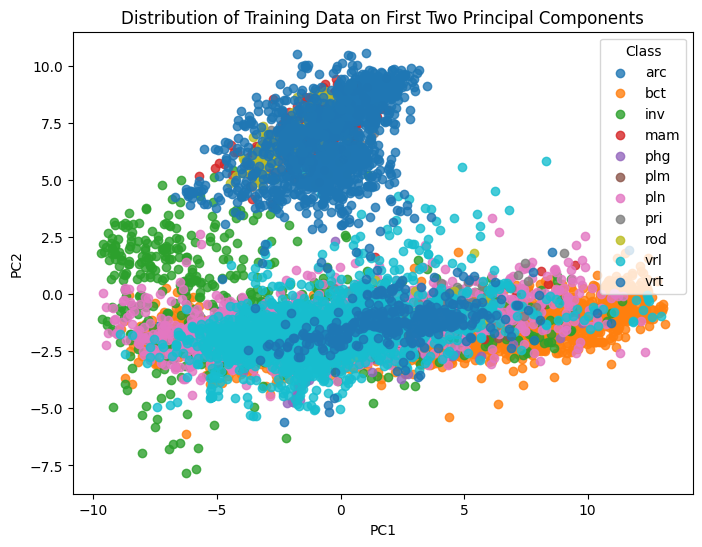

In [12]:
# First two principal components
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

# Convert labels to integers for coloring
unique_labels = np.unique(y_train)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
colors = np.array([label_to_int[label] for label in y_train])

plt.figure(figsize=(8,6))

# Plot each class separately for legend
for label in unique_labels:
    plt.scatter(
        pc1[y_train==label],
        pc2[y_train==label],
        alpha=0.8,
        label=label
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribution of Training Data on First Two Principal Components")
plt.legend(title="Class")
plt.show()

### Human, chimp, gorilla

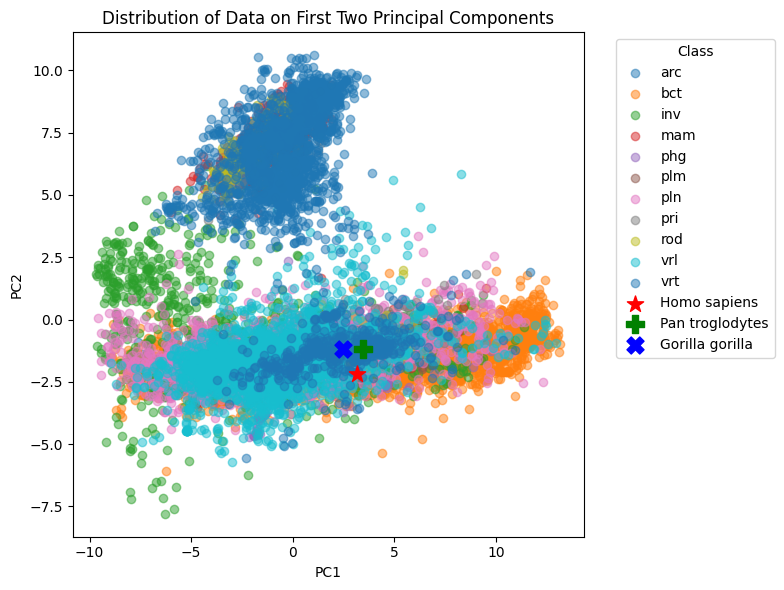

In [13]:
# Combine train and test for plotting
X_full = np.vstack([X_train, X_test])
y_full = np.concatenate([y_train, y_test])
species_full = np.concatenate([species_train, species_test])

# PCA on full dataset
pca = PCA(n_components=2)
X_pca_full = pca.fit_transform(X_full)
pc1_full = X_pca_full[:, 0]
pc2_full = X_pca_full[:, 1]

# Unique kingdom labels for coloring
unique_labels = np.unique(y_full)

plt.figure(figsize=(8,6))

# Plot points by kingdom
for label in unique_labels:
    idx = np.where(y_full == label)[0]
    plt.scatter(
        pc1_full[idx],
        pc2_full[idx],
        alpha=0.5,
        label=label
    )

# Highlight specific species
highlight_species = ["Homo sapiens", "Pan troglodytes", "Gorilla gorilla"]
highlight_colors = ["red", "green", "blue"]
highlight_markers = ["*", "P", "X"]

for sp, color, marker in zip(highlight_species, highlight_colors, highlight_markers):
    idx = np.where(species_full == sp)[0]
    if len(idx) > 0:
        plt.scatter(
            pc1_full[idx],
            pc2_full[idx],
            color=color,
            marker=marker,
            s=150,
            label=sp
        )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribution of Data on First Two Principal Components")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)  # use ALL samples

pc1 = X_pca_full[:, 0]
pc2 = X_pca_full[:, 1]

outlier_idx = np.where((pc1 > 7.5) & (pc2 > 5))[0]

print("Outlier indices:", outlier_idx)
print("Outlier species:")
for i in outlier_idx:
    print(species[i])

Outlier indices: [34]
Outlier species:
Grapevine fleck virus


In [15]:
### 3d visualization

'''from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=colors,
    cmap='tab10',
    s=30,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization")

plt.show()'''

'from mpl_toolkits.mplot3d import Axes3D\n\nfig = plt.figure(figsize=(10,8))\nax = fig.add_subplot(111, projection=\'3d\')\n\nax.scatter(\n    X_train_pca[:, 0],\n    X_train_pca[:, 1],\n    X_train_pca[:, 2],\n    c=colors,\n    cmap=\'tab10\',\n    s=30,\n    alpha=0.8\n)\n\nax.set_xlabel("PC1")\nax.set_ylabel("PC2")\nax.set_zlabel("PC3")\nax.set_title("3D PCA Visualization")\n\nplt.show()'

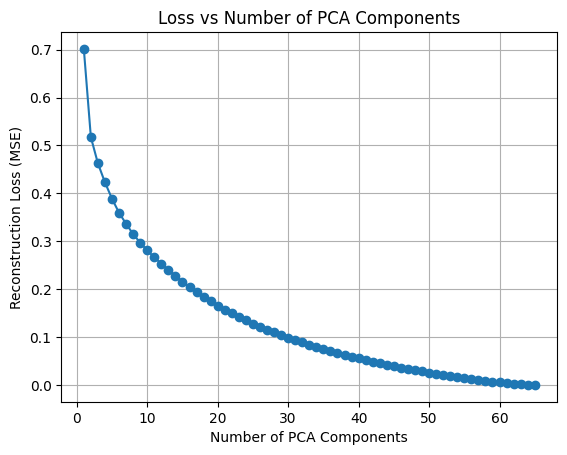

In [16]:
### Reconstruction loss vs number of components


losses = []
components_range = range(1, X_train.shape[1] + 1)

for k in components_range:
    pca_k = PCA(n_components=k)
    X_train_pca = pca_k.fit_transform(X_train)
    X_train_reconstructed = pca_k.inverse_transform(X_train_pca)

    loss = mean_squared_error(X_train, X_train_reconstructed)
    losses.append(loss)

plt.plot(components_range, losses, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction Loss (MSE)')
plt.title('Loss vs Number of PCA Components')
plt.grid(True)
plt.show()

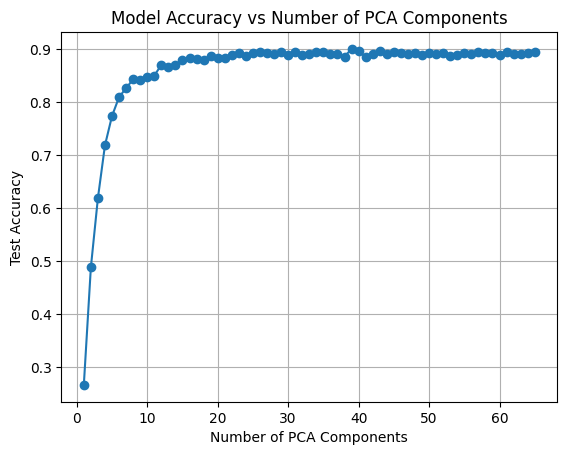

In [17]:
### Model accuracy vs. num. components

accs = []
components_range = range(1, X_train.shape[1] + 1)

for k in components_range:
    pca_k = PCA(n_components=k)
    X_train_pca = pca_k.fit_transform(X_train)
    X_test_pca = pca_k.transform(X_test)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accs.append(accuracy_score(y_test, y_pred))

plt.plot(components_range, accs, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy vs Number of PCA Components')
plt.grid(True)
plt.show()

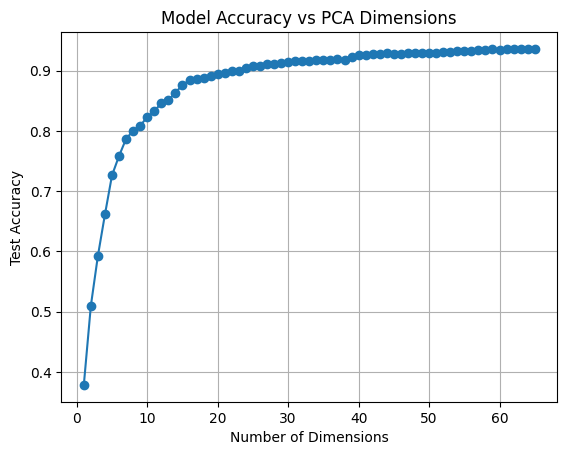

In [18]:
### Number of dimensions vs loss

pca = PCA()
X_train_pca_full = pca.fit_transform(X_train)
X_test_pca_full  = pca.transform(X_test)

components_range = range(1, X_train.shape[1] + 1)
accs = []

for k in components_range:
    X_train_pca_k = X_train_pca_full[:, :k]
    X_test_pca_k  = X_test_pca_full[:, :k]
    
    model = SVC(random_state=42)
    model.fit(X_train_pca_k, y_train)
    y_pred = model.predict(X_test_pca_k)
    
    accs.append(accuracy_score(y_test, y_pred))

plt.plot(components_range, accs, marker='o')
plt.xlabel("Number of Dimensions")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy vs PCA Dimensions")
plt.grid(True)
plt.show()

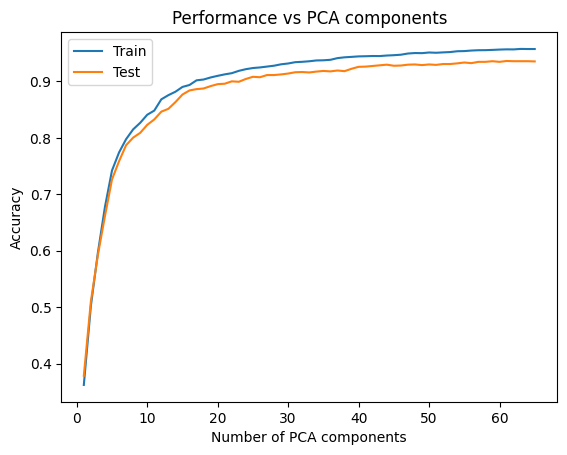

In [19]:
train_scores, test_scores = [], []
for n in range(1, X_train.shape[1]+1):
    model.fit(X_train_pca[:, :n], y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train_pca[:, :n])))
    test_scores.append(accuracy_score(y_test, model.predict(X_test_pca[:, :n])))

plt.plot(range(1, X_train.shape[1]+1), train_scores, label='Train')
plt.plot(range(1, X_train.shape[1]+1), test_scores, label='Test')
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance vs PCA components')
plt.show()

In [20]:
len(feature_cols)

65

In [21]:
### LOOKING AT HOW THE PRINCIPAL COMPONENTS ARE MADE UP:

n_components = 2  # first 2 PCs
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)  # X_train = codon features scaled

# Convert to DataFrame for readability
pc_df = pd.DataFrame(pca.components_, columns=feature_cols, index=[f'PC{i+1}' for i in range(n_components)])

print(pc_df.shape)

# Print first two principal components and their contributions from each feature
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pc_df.T)



(2, 65)
              PC1       PC2
Ncodons  0.012116 -0.014268
UUU     -0.161994 -0.018140
UUC      0.090166  0.175775
UUA     -0.169759  0.041153
UUG     -0.062414 -0.169689
CUU     -0.093243  0.105885
CUC      0.120959  0.185001
CUA     -0.041742  0.259893
CUG      0.185756 -0.052599
AUU     -0.172109  0.071596
AUC      0.100368  0.204284
AUA     -0.134639  0.143735
AUG      0.026432 -0.186087
GUU     -0.128608 -0.129036
GUC      0.188165 -0.013673
GUA     -0.152360  0.075128
GUG      0.153911 -0.135736
GCU     -0.091542 -0.087987
GCC      0.184919  0.094651
GCA     -0.077784  0.090448
GCG      0.168102 -0.090759
CCU     -0.099080 -0.035037
CCC      0.125744  0.146136
CCA     -0.079958  0.152391
CCG      0.173138 -0.090066
UGG      0.055060 -0.173037
GGU     -0.063816 -0.143576
GGC      0.194503  0.004344
GGA     -0.095175  0.073438
GGG      0.068698 -0.058903
UCU     -0.150855 -0.063175
UCC      0.095560  0.145044
UCA     -0.141580  0.136776
UCG      0.138487 -0.111987
AGU     -0.1

In [22]:
# First principal component
pc1 = pc_df.loc['PC1']

# Initialize sums
gc_sum = 0
au_sum = 0

for codon, weight in pc1.items():
    last_base = codon[-1].upper()
    if last_base in ['G', 'C']:
        gc_sum += weight
    elif last_base in ['A', 'U', 'T']:  # depending on whether DNA or RNA, include 'T'
        au_sum += weight

print(f"Sum of PC1 weights for codons ending in G/C: {gc_sum:.4f}")
print(f"Sum of PC1 weights for codons ending in A/U: {au_sum:.4f}")
print(f"GC/AU ratio in PC1: {gc_sum/au_sum:.4f}")

print(pc1["AUG"])

Sum of PC1 weights for codons ending in G/C: 3.7478
Sum of PC1 weights for codons ending in A/U: -3.5016
GC/AU ratio in PC1: -1.0703
0.026432413441547623


In [23]:
# First principal component
pc2 = pc_df.loc['PC2']

# Initialize sums
g_sum = 0
a_sum = 0
c_sum = 0
u_sum = 0

for codon, weight in pc2.items():
    last_base = codon[-1].upper()
    if last_base in ['A']:
        a_sum += weight
    elif last_base in ['U']: 
        u_sum += weight
    elif last_base in ['C']:
        c_sum += weight
    elif last_base in ['G']:
        g_sum += weight

print(f"Sum of PC2 weights for codons ending in G: {g_sum:.4f}")
print(f"Sum of PC2 weights for codons ending in A: {a_sum:.4f}")
print(f"Sum of PC2 weights for codons ending in C: {c_sum:.4f}")
print(f"Sum of PC2 weights for codons ending in U: {u_sum:.4f}")

print(pc2["AUG"])

Sum of PC2 weights for codons ending in G: -1.8660
Sum of PC2 weights for codons ending in A: 1.2536
Sum of PC2 weights for codons ending in C: 1.2092
Sum of PC2 weights for codons ending in U: -1.2667
-0.18608741823119343


In [24]:
# Assume:
# pca = PCA(...)
# pca.components_ exists
# feature_cols is the list of codon feature names

import pandas as pd
import numpy as np

# Extract PC1 weights
pc1 = pca.components_[0]

# Build DataFrame
pc1_df = pd.DataFrame({
    "Feature": feature_cols,
    "Weight": pc1,
    "AbsWeight": np.abs(pc1)
})

# Sort by absolute value, descending
pc1_sorted = pc1_df.sort_values("AbsWeight", ascending=False)

# Print full table without truncation
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(pc1_sorted)

    Feature    Weight  AbsWeight
27      GGC  0.194503   0.194503
14      GUC  0.188165   0.188165
8       CUG  0.185756   0.185756
18      GCC  0.184919   0.184919
59      GAC  0.184573   0.184573
53      CGC  0.184141   0.184141
24      CCG  0.173138   0.173138
9       AUU -0.172109   0.172109
3       UUA -0.169759   0.169759
44      AAU -0.169090   0.169090
20      GCG  0.168102   0.168102
40      UAU -0.167282   0.167282
1       UUU -0.161994   0.161994
50      AAA -0.156507   0.156507
55      CGG  0.154601   0.154601
16      GUG  0.153911   0.153911
15      GUA -0.152360   0.152360
36      ACU -0.151837   0.151837
30      UCU -0.150855   0.150855
43      CAG  0.143568   0.143568
61      GAG  0.142672   0.142672
39      ACG  0.142496   0.142496
32      UCA -0.141580   0.141580
33      UCG  0.138487   0.138487
37      ACC  0.135954   0.135954
11      AUA -0.134639   0.134639
35      AGC  0.134171   0.134171
49      CAC  0.132696   0.132696
13      GUU -0.128608   0.128608
22      CC

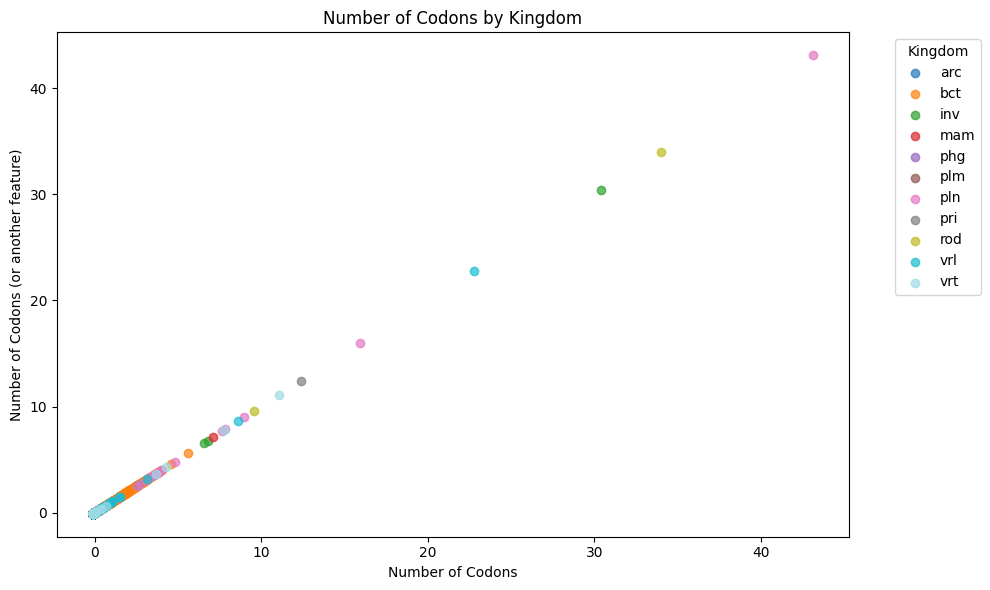

In [25]:
import matplotlib.pyplot as plt

# Total codons are in the first column of X_train
codon_counts = X_train[:, 0]

plt.figure(figsize=(10,6))

# Get unique kingdoms
unique_kingdoms = np.unique(y_train)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_kingdoms)))

# Plot each kingdom separately
for kingdom, color in zip(unique_kingdoms, colors):
    idx = y_train == kingdom
    plt.scatter(
        codon_counts[idx],
        codon_counts[idx],  # you could replace this with another feature if desired
        color=color,
        alpha=0.7,
        label=kingdom
    )

plt.xlabel("Number of Codons")
plt.ylabel("Number of Codons (or another feature)")
plt.title("Number of Codons by Kingdom")
plt.legend(title="Kingdom", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
# Assume:
# pca = PCA(...)
# pca.components_ exists
# feature_cols is the list of codon feature names

import pandas as pd
import numpy as np

# Extract PC1 weights
pc2 = pca.components_[0]

# Build DataFrame
pc2_df = pd.DataFrame({
    "Feature": feature_cols,
    "Weight": pc2,
    "AbsWeight": np.abs(pc2)
})

# Sort by absolute value, descending
pc2_sorted = pc2_df.sort_values("AbsWeight", ascending=False)

# Print full table without truncation
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(pc2_sorted)

    Feature    Weight  AbsWeight
27      GGC  0.194503   0.194503
14      GUC  0.188165   0.188165
8       CUG  0.185756   0.185756
18      GCC  0.184919   0.184919
59      GAC  0.184573   0.184573
53      CGC  0.184141   0.184141
24      CCG  0.173138   0.173138
9       AUU -0.172109   0.172109
3       UUA -0.169759   0.169759
44      AAU -0.169090   0.169090
20      GCG  0.168102   0.168102
40      UAU -0.167282   0.167282
1       UUU -0.161994   0.161994
50      AAA -0.156507   0.156507
55      CGG  0.154601   0.154601
16      GUG  0.153911   0.153911
15      GUA -0.152360   0.152360
36      ACU -0.151837   0.151837
30      UCU -0.150855   0.150855
43      CAG  0.143568   0.143568
61      GAG  0.142672   0.142672
39      ACG  0.142496   0.142496
32      UCA -0.141580   0.141580
33      UCG  0.138487   0.138487
37      ACC  0.135954   0.135954
11      AUA -0.134639   0.134639
35      AGC  0.134171   0.134171
49      CAC  0.132696   0.132696
13      GUU -0.128608   0.128608
22      CC

# Perform non-linear dimensionality reduction algorithm

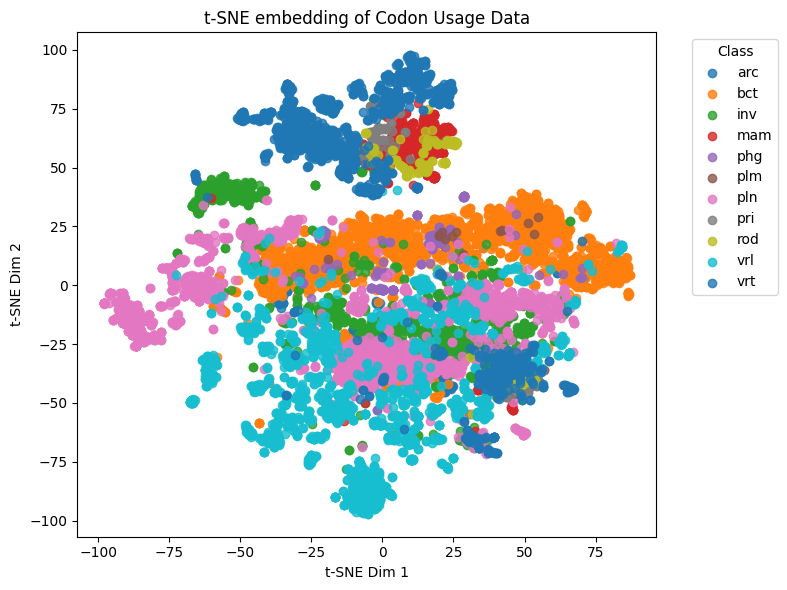

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Get unique labels
unique_labels = np.unique(y_train)

plt.figure(figsize=(8,6))

# Plot each class separately for proper legend
for label in unique_labels:
    idx = y_train == label
    plt.scatter(
        X_train_tsne[idx, 0],
        X_train_tsne[idx, 1],
        alpha=0.8,
        label=label
    )

plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title('t-SNE embedding of Codon Usage Data')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Fit Isomap on training data
n_components_max = 10  # you can try up to ~10 components; increase if desired
train_scores = []
test_scores = []

for n in range(2, n_components_max + 1):  # Isomap requires >=2 dims
    iso = Isomap(n_components=n)
    X_train_iso = iso.fit_transform(X_train)
    X_test_iso = iso.transform(X_test)
    
    # Fit your classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_iso, y_train)
    
    # Compute accuracy
    y_pred_train = model.predict(X_train_iso)
    y_pred_test  = model.predict(X_test_iso)
    
    train_scores.append(accuracy_score(y_train, y_pred_train))
    test_scores.append(accuracy_score(y_test, y_pred_test))

/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity struct

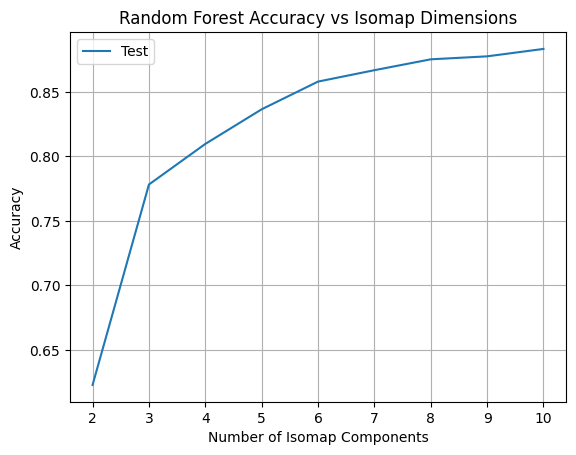

In [29]:
#plt.plot(range(2, n_components_max + 1), train_scores, label='Train')
plt.plot(range(2, n_components_max + 1), test_scores, label='Test')
plt.xlabel('Number of Isomap Components')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Isomap Dimensions')
plt.legend()
plt.grid(True)
plt.show()

/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/olivialaufer/Desktop/SYDE project/venv/lib/python3.14/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity struct

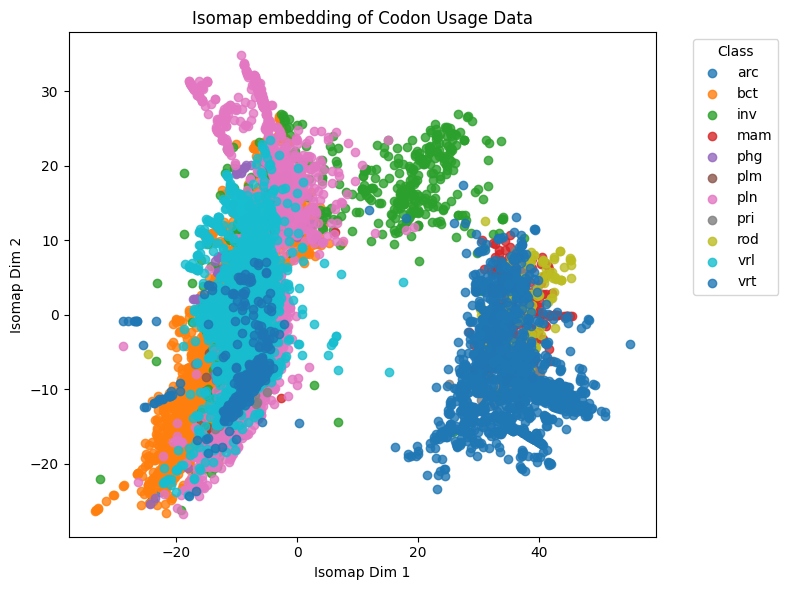

In [30]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import numpy as np

# Pick 2 components for plotting
iso_2d = Isomap(n_components=2)
X_train_iso_2d = iso_2d.fit_transform(X_train)

# Get unique labels
unique_labels = np.unique(y_train)

plt.figure(figsize=(8,6))

# Plot each class separately for legend
for label in unique_labels:
    idx = y_train == label
    plt.scatter(
        X_train_iso_2d[idx, 0],
        X_train_iso_2d[idx, 1],
        alpha=0.8,
        label=label
    )

plt.xlabel('Isomap Dim 1')
plt.ylabel('Isomap Dim 2')
plt.title('Isomap embedding of Codon Usage Data')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
#umap

In [32]:
#isomap

In [33]:
### Plot the data in the new dimensional space and comment on how well the mapping separates the data

In [34]:
### Plot the performance metric against how many of the new dimensions are used

# Checking Amino Acid Correlation

In [35]:
# Assuming X is your codon frequency DataFrame
codon_corr = X.corr()  # correlation matrix of codons
plt.figure(figsize=(12,10))
sns.heatmap(codon_corr, cmap='coolwarm', center=0)
plt.title("Codon Frequency Correlation Heatmap")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# PC1 loadings
pc1_loadings = pd.Series(pca.components_[0], index=X.columns)
pc2_loadings = pd.Series(pca.components_[1], index=X.columns)

# Sort by magnitude
print("Top contributors to PC1:")
print(pc1_loadings.abs().sort_values(ascending=False).head(10))
print("\nTop contributors to PC2:")
print(pc2_loadings.abs().sort_values(ascending=False).head(10))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Example mapping
aa_map = {
    'Phe': ['TTT', 'TTC'],
    'Leu': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    # add all codons...
}

# Sum loadings for each amino acid
aa_loadings_pc1 = {aa: pc1_loadings[codons].sum() for aa, codons in aa_map.items()}
print(aa_loadings_pc1)

NameError: name 'pc1_loadings' is not defined

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

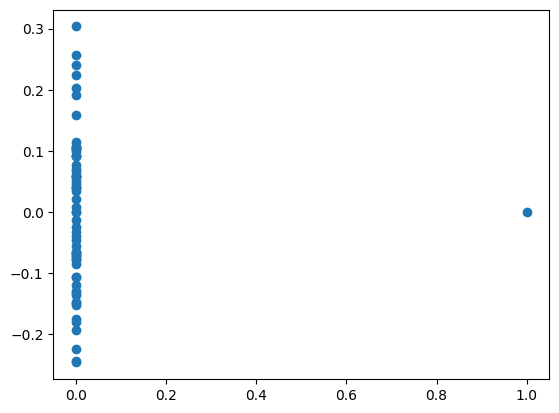

In [ ]:
plt.scatter(pca.components_[0], pca.components_[1])
for i, codon in enumerate(X.columns):
    plt.text(pca.components_[0, i], pca.components_[1, i], codon)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Codon contributions in PC space")
plt.show()

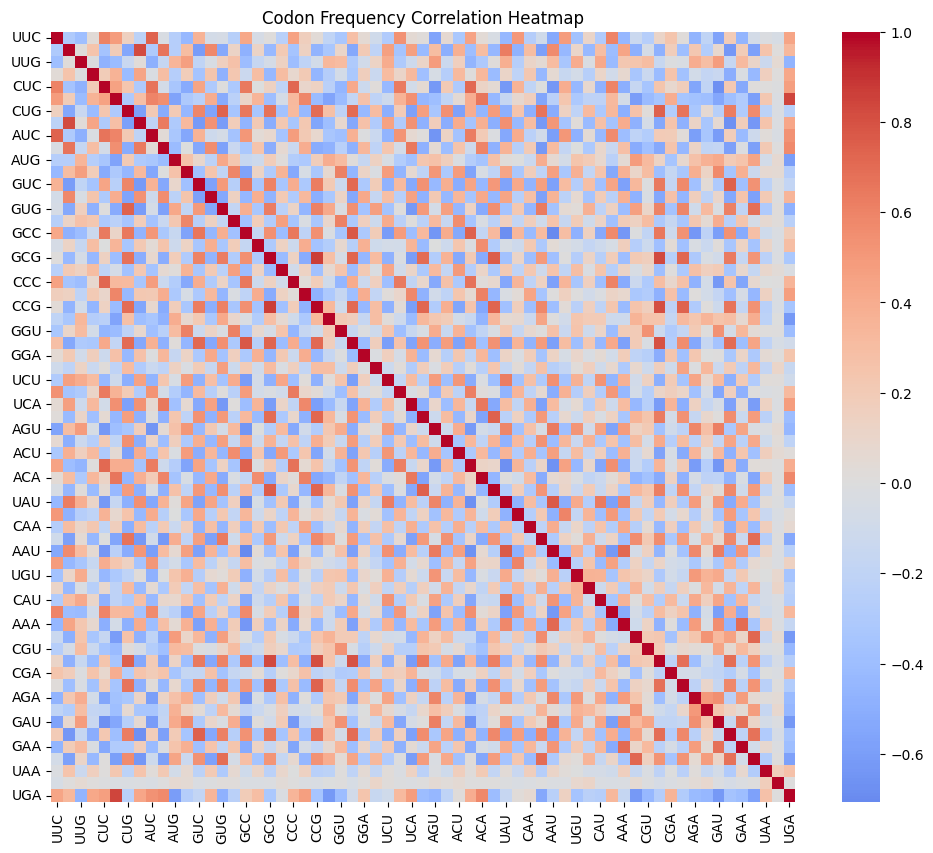

In [ ]:
feature_cols = data.columns[6:69]  # or whatever range you use

# Select as a DataFrame (not .values!)
X_df = data[feature_cols]

# Compute correlation
codon_corr = X_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(codon_corr, cmap='coolwarm', center=0)
plt.title("Codon Frequency Correlation Heatmap")
plt.show()

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assume feature_cols are codon columns and data['Kingdom'] is your label
X_df = data[feature_cols]
y = data['Kingdom']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=min(len(y.unique())-1, X_train.shape[1]))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

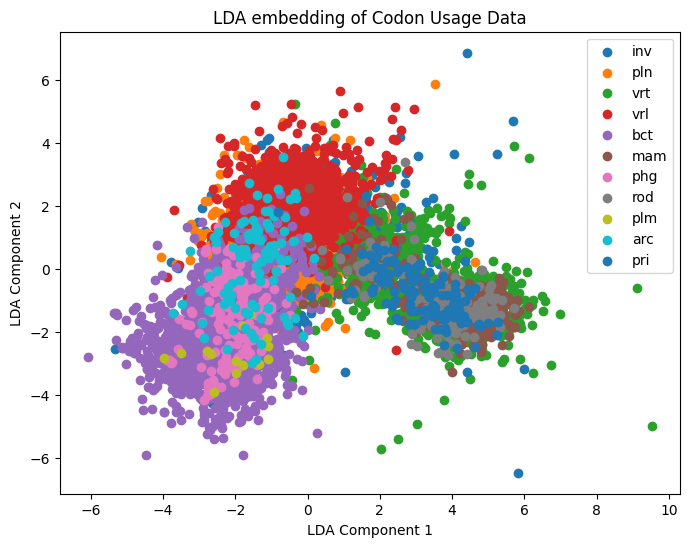

In [ ]:
# If you have at least 2 LDA components
plt.figure(figsize=(8,6))
for label in y_train.unique():
    plt.scatter(
        X_train_lda[y_train==label, 0], 
        X_train_lda[y_train==label, 1], 
        label=label
    )

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA embedding of Codon Usage Data")
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_lda, y_train)

y_train_pred = model.predict(X_train_lda)
y_test_pred = model.predict(X_test_lda)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

Train Accuracy: 1.000, Test Accuracy: 0.856


In [ ]:
# LDA coefficients for each feature
lda_coef = pd.DataFrame(lda.coef_, columns=X_df.columns, index=lda.classes_)
print(lda_coef)

          UUC       UUA       UUG       CUU       CUC       CUA       CUG  \
arc  0.675829  1.472957  0.395634  1.217515  3.274798  2.350330  1.870694   
bct -0.691089  0.036485 -0.153263 -0.067004  0.109191 -0.344108  0.312280   
inv -0.307445 -0.278967  0.255966 -1.117190 -0.969084 -2.648680 -1.131486   
mam  0.493195 -0.325337  0.072991  0.331617  0.359785  3.191866  2.641362   
phg  0.047636 -1.311786 -0.754284  0.424515  0.801990  1.050178  0.246699   
plm -0.216269 -0.364649 -0.349243  0.060170 -0.607020 -0.125421  0.913992   
pln  0.356072  0.360934  0.456429  0.164139 -0.041531  0.078143 -1.071341   
pri  0.815253 -0.815137 -0.718078  0.495422  1.272919  2.198306  2.989057   
rod  1.433086 -0.078812 -0.056206  0.941009 -0.618072 -0.414808  1.788363   
vrl -0.151217 -0.568796 -0.065086 -0.463642 -0.639224 -0.271673 -1.471059   
vrt  0.545312  0.687567 -0.309286  0.899419  0.971786  1.194413  2.281148   

          AUU       AUC       AUA  ...       CGG       AGA       AGG  \
arc

# Run on another dataset

ValueError: Expected 2D array, got 1D array instead:
array=[6.78e+02 2.06e-02 3.24e-02 2.90e-03 1.18e-02 2.21e-02 1.47e-02 8.80e-03
 8.80e-03 1.77e-02 1.03e-02 1.33e-02 1.62e-02 2.51e-02 1.77e-02 5.90e-03
 1.47e-02 1.62e-02 1.62e-02 1.03e-02 1.03e-02 1.03e-02 7.40e-03 1.33e-02
 8.80e-03 7.40e-03 1.03e-02 1.18e-02 3.10e-02 5.90e-03 1.62e-02 7.40e-03
 1.03e-02 5.90e-03 1.03e-02 1.33e-02 1.03e-02 7.40e-02 8.80e-03 4.40e-03
 1.18e-02 1.92e-02 2.95e-02 4.28e-02 1.33e-02 1.92e-02 1.03e-02 1.92e-02
 1.18e-02 5.90e-03 4.13e-02 4.28e-02 5.90e-03 5.90e-03 1.03e-02 1.18e-02
 1.33e-02 1.62e-02 1.33e-02 2.51e-02 8.11e-02 4.87e-02 0.00e+00 1.50e-03
 1.50e-03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import requests
import pandas as pd
import re
from io import StringIO

url = "https://www.kazusa.or.jp/codon/cgi-bin/showcodon.cgi?species=171929"
resp = requests.get(url)
html = resp.text

# Extract lines containing codon usage
pattern = r"([ACGU]{3})\s+([\d\.]+)\(\s*(\d+)\)"
matches = re.findall(pattern, html)

data = []
for codon, freq_str, count_str in matches:
    data.append({
        "codon": codon,
        "freq_per_1000": float(freq_str),
        "count": int(count_str)
    })

df = pd.DataFrame(data).set_index("codon")

print(df.sort_index())

       freq_per_1000  count
codon                      
AAA             41.3     28
AAC             19.2     13
AAG             42.8     29
AAU             13.3      9
ACA              8.8      6
...              ...    ...
UGU             10.3      7
UUA              2.9      2
UUC             32.4     22
UUG             11.8      8
UUU             20.6     14

[64 rows x 2 columns]


In [ ]:


# herpes
sample_values = [355849, 0.01504, 0.01401, 0.00234, 0.0112, 0.00959,
    0.01916, 0.00437, 0.04699, 0.00923, 0.02115, 0.00417, 0.0195, 0.01063, 0.0254, 0.00712,
    0.02872, 0.00599, 0.06128, 0.00723, 0.03521, 0.00694, 0.053, 0.01141, 0.026, 0.01148,
    0.00796, 0.02906, 0.00793, 0.03621, 0.00432, 0.01897, 0.00225, 0.01592, 0.00336, 0.01828,
    0.00381, 0.04191, 0.00699, 0.02283, 0.00526, 0.0209, 0.00759, 0.02309, 0.00267, 0.01909,
    0.00683, 0.01089, 0.00886, 0.0192, 0.00578, 0.01159, 0.00872, 0.03475, 0.00683, 0.01953,
    0.00176, 0.00328, 0.00731, 0.03901, 0.01093, 0.03608, 0.0009, 0.00149, 0.00073
]



sample_values = np.array(sample_values).reshape(1, -1)
print(sample_values.size)

sample_scaled = scaler.fit_transform(sample_values)



In [ ]:
# Put into DataFrame
#sample_df = pd.DataFrame([sample_values])

# --- PREDICT ---
prediction = model.predict(sample_scaled)
print(prediction)
'''probabilities = model.predict_proba(sample_scaled)

print("Predicted class:", prediction)
print("\nClass probabilities:")
for label, prob in zip(model.classes_, probabilities):
    print(label, prob)'''

In [ ]:
from sklearn.cluster import KMeans

k = 11  # choose the number of clusters you want
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Inspect cluster assignments
print(cluster_labels)

[0 0 1 ... 3 0 3]


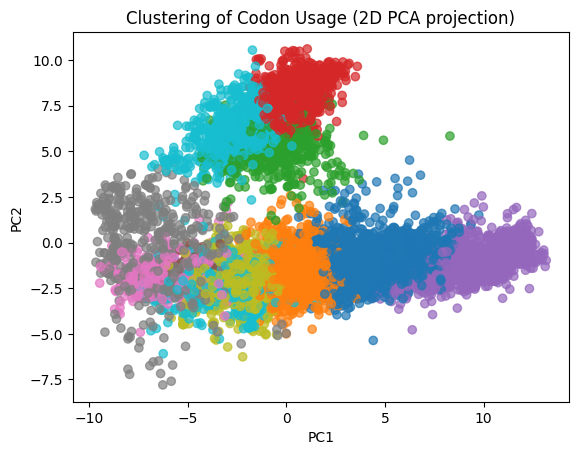

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering of Codon Usage (2D PCA projection)')
plt.show()